# Time Series Analysis

In this document, we perform Time Series Analysis after obtaining the data.

## 1 Obtaining the Data

### 1.1 Loading the data

First, we load the data from our [dataset](https://docs.google.com/spreadsheets/d/1jzNEJWQMvfK6aJeG28JSXecrLZfjeFOCYp-gtW0Q7LQ/edit#gid=1456408654) which we have made available online. 

We display the last three records as shown in the output to ensure that we have obtained all data properly.

In [476]:
# Load datasets
import pandas as pd
import gspread
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from scipy.stats import zscore

sa = gspread.service_account(filename="group-28-dataset-7233caedfe09.json")
sheet = sa.open("Dataset - Group 28")
work_sheet = sheet.worksheet("Fixed Data")

df = pd.DataFrame(work_sheet.get_all_values())

new_header = df.iloc[0] 
df = df[1:152] 
df.columns = new_header 
df = df.replace(r'^\s*$', np.nan, regex=True)

df.tail(3)


,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Quote Tweets,Views,Rating,Reasoning,Remarks,Thread/Tweet Language,Add columns here,Add columns here,Reviewer,Review
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,...,0,NaN,NaN,Tells that nurse on duty during vaccine appoin...,No location,Foreign,NaN,NaN,NaN,NaN
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,...,0,NaN,NaN,"Complains why cases went up, and points that p...",Location might be fake,Filipino,NaN,NaN,NaN,NaN
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@AdrianSBanal,Nabs,...,0,NaN,NaN,"Complains that vaccine might not be working, a...",NaN,Filipino,NaN,NaN,NaN,NaN


Shown here are all the current features of the dataset. 

This may include features with missing values.

In [477]:
print("List all current features:")
df.columns

List all current features:


Index(['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category',
       'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio',
       'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet',
       'Tweet Translated', 'Tweet Type', 'Date posted', 'Screenshot',
       'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views',
       'Rating', 'Reasoning', 'Remarks', 'Thread/Tweet Language',
       'Add columns here', 'Add columns here', 'Reviewer', 'Review'],
      dtype='object', name=0)

In [478]:
print("Display the number of records and features:")
df.shape

Display the number of records and features:


(151, 35)

### 1.2 Checking for Missing Values

Now, we check which features has no missing values.

From, here we can see that there are missing value on Account Bio, Location, Screenshot, etc.

In [479]:
print("Check for features with missing values:")
df.columns[df.isna().any()].tolist()

Check for features with missing values:


['Account bio',
 'Location',
 'Screenshot',
 'Quote Tweets',
 'Views',
 'Rating',
 'Remarks',
 'Add columns here',
 'Add columns here',
 'Reviewer',
 'Review']

Upon checking, the collectors deemed that the only necessary features for this project are as follows:

> `['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords',
    'Account handle', 'Account name', 'Account bio', 'Account type', 
    'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
    'Content type', 'Reasoning', 'Thread/Tweet Language',]`

From the previous output, we can verify that all of these features have no missing value.

In [480]:
print("Dataset summary:")
df_clean = df[['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords', 
         'Account handle', 'Account name', 'Account bio', 'Account type', 
         'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
         'Content type', 'Reasoning', 'Thread/Tweet Language',]]
df_clean.tail(4)

Dataset summary:


,ID,Timestamp,Tweet URL,Group,Keywords,Account handle,Account name,Account bio,Account type,Tweet,Tweet Translated,Tweet Type,Date posted,Content type,Reasoning,Thread/Tweet Language
148,28-148,18/04/2023 23:43:56,https://twitter.com/HatzPurp/status/1385080074...,28,"""covid"" ""vaccine"" ""metal""",@HatzPurp,Hatz Purp,Versatile,Anonymous,Covid-19 is a man-made Virus released on the p...,Covid-19 is a man-made Virus released on the p...,"Text, Reply",22/04/21 11:56,Rational,Says that covid is man-made to make the public...,Foreign
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,tall glass of yogurt,Anonymous,Was just waiting to get COVID vaccine and the ...,Was just waiting to get COVID vaccine and the ...,Text,6/4/21 2:35,Emotional,Tells that nurse on duty during vaccine appoin...,Foreign
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,— ɪ’ᴍ ᴀ ᴘᴀʀᴀᴅᴏx.,Anonymous,"Kung kelan nagkaroon ng bakuna kontra COVID, t...","When there was a vaccine against COVID, positi...",Text,16/03/21 10:41,Emotional,"Complains why cases went up, and points that p...",Filipino
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"""bakuna"" ""tubig""",@AdrianSBanal,Nabs,Malas lang,Anonymous,Taenang bakuna walang epekto tubig baha lang a...,"Taenang vaccine has no effect, it's just flood...",Text,24/07/21 19:01,Emotional,"Complains that vaccine might not be working, a...",Filipino


The table shows a simple summary of our clean dataset. Some notable observations are as follows: 
- ID, Tweet URL, Tweet, and Tweet Translated have unique values.
- 82 out of 151 tweets are of Emotional content type.
- There are 78 Foreign Tweets. This also implies that the remaining 73 tweets are Filipino Tweets.
- Ven Cuenca has four tweets on this dataset.

### 1.3 Ensuring Formatting Consistency

For this subsection, we will check formatting consistency of some features.

For timestamp, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [481]:
df_clean.loc[0:151, "Timestamp"] = pd.to_datetime(df_clean["Timestamp"], format='%d/%m/%Y %H:%M:%S').copy()
df_clean["Timestamp"].apply(pd.to_datetime)

1     2023-02-27 13:34:22
2     2023-02-27 13:40:42
3     2023-03-03 03:23:13
4     2023-03-03 03:31:35
5     2023-03-03 03:43:09
              ...        
147   2023-04-18 23:41:34
148   2023-04-18 23:43:56
149   2023-04-18 23:47:41
150   2023-04-18 23:54:57
151   2023-04-18 23:59:24
Name: Timestamp, Length: 151, dtype: datetime64[ns]

For date posted, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [482]:
df_clean.loc[0:151, "Date posted"] = pd.to_datetime(df_clean["Date posted"], format='%d/%m/%y %H:%M').copy()
df_clean["Date posted"].apply(pd.to_datetime)

1     2021-08-24 19:34:00
2     2021-08-20 13:59:00
3     2021-08-14 21:35:00
4     2021-08-09 20:12:00
5     2021-08-04 15:54:00
              ...        
147   2021-03-02 19:07:00
148   2021-04-22 11:56:00
149   2021-04-06 02:35:00
150   2021-03-16 10:41:00
151   2021-07-24 19:01:00
Name: Date posted, Length: 151, dtype: datetime64[ns]

## 2 Time Series Analysis

### 2.1 Feature Generation

For the time series analysis, the team intends to observe what timeframes have high frequence of tweet posted.

To fulfill this, we created new a feature named Count as time series data. 

Count is the number of tweets posted in a certain time or time range.

In [483]:
df_dates = pd.DataFrame({"Date": df_clean["Date posted"].apply(pd.to_datetime), "Count":1})
df_dates_language = df_dates.assign(
                Filipino_Count=df_dates['Count'] * df_clean["Thread/Tweet Language"].eq('Filipino'),
                Foreign_Count=df_dates['Count'] * df_clean["Thread/Tweet Language"].eq('Foreign'),)

df_dates_language

,Date,Count,Filipino_Count,Foreign_Count
1,2021-08-24 19:34:00,1,1,0
2,2021-08-20 13:59:00,1,1,0
3,2021-08-14 21:35:00,1,1,0
4,2021-08-09 20:12:00,1,1,0
5,2021-08-04 15:54:00,1,1,0
...,...,...,...,...
147,2021-03-02 19:07:00,1,0,1
148,2021-04-22 11:56:00,1,0,1
149,2021-04-06 02:35:00,1,0,1
150,2021-03-16 10:41:00,1,1,0


From the Count and the Language features, we also generated two more features: Filipino_Count and Foreign_Count.

Filipino_Count is the number of Filipino tweets posted given a certain time or time range.

Foreign_Count is the number of Foreign tweets posted given a certain time or time range.

### 2.2 Binning

To organize time series data, the group performed data binning on the newly generated features. 

The binning technique employed is via grouping. The features are grouped as sum of count in a semimonthly manner.

The table below shows the binned data with 71 rows.

In [484]:
df_bin = df_dates_language.groupby(pd.Grouper(key="Date", freq="SMS")).sum()
display(df_bin)

print(f"Sum of 'Count': {df_bin['Count'].sum()}")
print(f"Sum of 'Filipino_Count': {df_bin['Filipino_Count'].sum()}")
print(f"Sum of 'Foreign_Count': {df_bin['Foreign_Count'].sum()}")

,Count,Filipino_Count,Foreign_Count
Date,,,
2020-01-15,1,1,0
2020-02-01,0,0,0
2020-02-15,0,0,0
2020-03-01,1,0,1
2020-03-15,1,0,1
...,...,...,...
2022-10-15,1,0,1
2022-11-01,0,0,0
2022-11-15,1,0,1


Sum of 'Count': 151
Sum of 'Filipino_Count': 73
Sum of 'Foreign_Count': 78


Upon displaying the sums of each column, we can notice that it matches the total number of sample.

The team has 151 samples where 73 are labeled as Filipino and 78 are labeled as Foreign.

### 2.3 Interpolation

Since the time-series data is binned in a semimonthly manner, resampling the data by decreasing the period length would result to missing values.

The team resampled the data by adjusting the period length from semimonthly to hourly. We also have increased the rows from 71 to 25561.

To fill in the missing values, we performed cubic spline interpolation with K=3. Shown below is the table of the interpolated time series data of Tweet Counts per Hour.  

In [485]:
df_resampled = df_bin.resample('H').mean()
df_interpolated = df_resampled.interpolate(method='cubic', order=3)
df_interpolated

,Count,Filipino_Count,Foreign_Count
Date,,,
2020-01-15 00:00:00,1.000000,1.000000,0.000000
2020-01-15 01:00:00,0.997434,0.994943,0.002491
2020-01-15 02:00:00,0.994866,0.989903,0.004963
2020-01-15 03:00:00,0.992295,0.984879,0.007416
2020-01-15 04:00:00,0.989721,0.979871,0.009850
...,...,...,...
2022-12-14 20:00:00,12.000646,-0.000010,12.000656
2022-12-14 21:00:00,12.000632,-0.000008,12.000640
2022-12-14 22:00:00,12.000520,-0.000005,12.000525


### 2.4 Line Graphs - Time Series

To visualize our binned data and interpolated data, line graphs were created displaying the differnce among count features accross time.

The first line graph displays the original time series data that records tweet frequency in a semimonthly interval.

The second line graph displays the interpolated data that records tweet frequency in an hourly manner.

Text(0.5, 1.0, 'Interpolation of Tweet Counts (Hourly)')

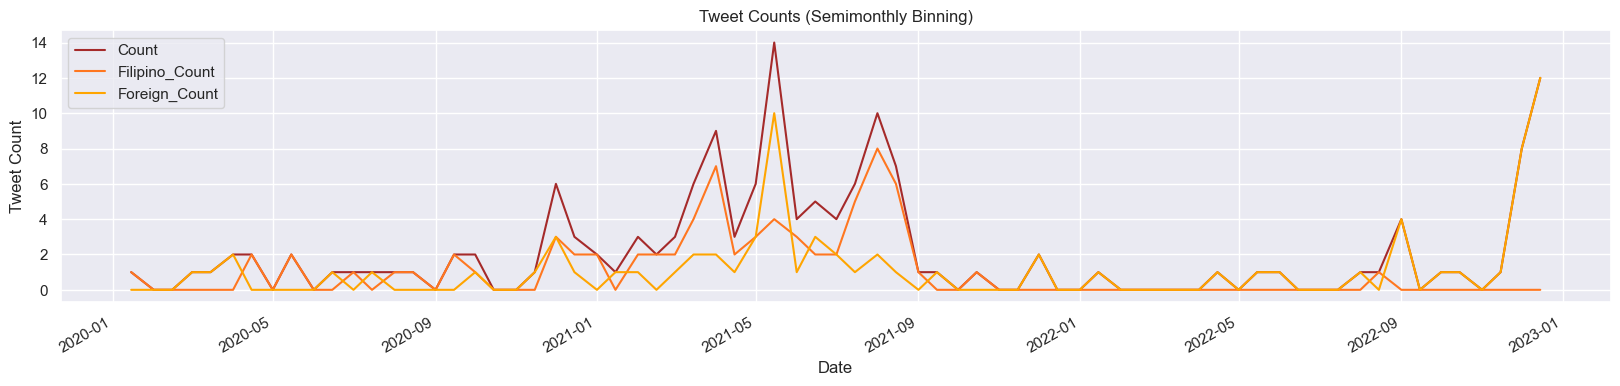

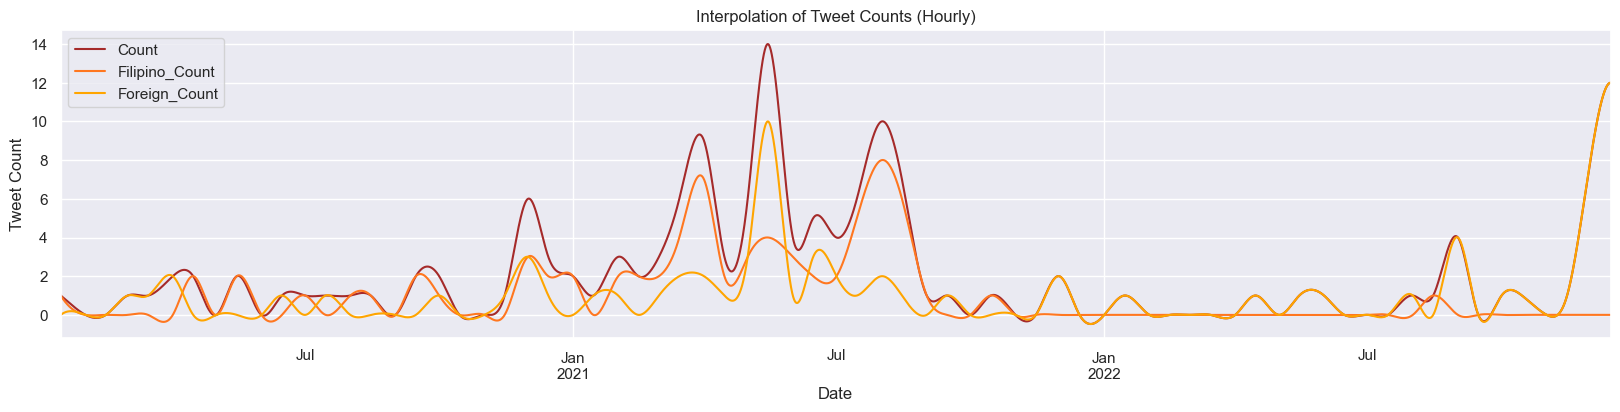

In [486]:
color_dict = {'Count':'brown', 'Filipino_Count':'#FF7720', 'Foreign_Count':'orange'}

ax_in = df_bin.plot(figsize=(20,4), color=[color_dict.get(x, '#333333') for x in df_bin.columns])
ax_in.set_ylabel('Tweet Count')
ax_in.set_title("Tweet Counts (Semimonthly Binning)")

ax_bin = df_interpolated.plot(figsize=(20,4), color=[color_dict.get(x, '#333333') for x in df_interpolated.columns])
ax_bin.set_ylabel('Tweet Count')
ax_bin.set_title("Interpolation of Tweet Counts (Hourly)")

Notice that the interpolated graph has smoother plot since we have provided estimated values that increased the number of data points.

We can also observe the following trends:
- All tweets considered, many tweets were posted on the second half of May 2021.
- For Filipino Tweets, many tweets were posted on the first half of August 2021. 
- For Foreign Tweets, many tweets were posted on the first second half of December 2022. 

### 2.5 Standardization

First, we look into the mean and standard deviation of each features.

When all samples are considered in our dataset, approximately two tweets are being posted semimonthly on average.

Filipino_Count have narrower spread than Foreign_Count. When combined, we obtained a wider spread.

In [487]:
print("Mean of Tweet Counts (Semimonthly)")
display(df_bin.mean())

print("Standard Deviation of Tweet Counts (Semimonthly)")
display(df_bin.std())

Mean of Tweet Counts (Semimonthly)


Count             2.126761
Filipino_Count    1.028169
Foreign_Count     1.098592
dtype: float64

Standard Deviation of Tweet Counts (Semimonthly)


Count             2.975757
Filipino_Count    1.731818
Foreign_Count     2.112243
dtype: float64

Now, we standardize our time series data by obtaining the Z-scores of all data points.

Upon standardizing the data, we could observe the following:
- there are 2 outliers in Count
- there are 2 outliers in Filipino_Count
- there are 3 outliers in Foreign_Count

In [488]:
df_scaled = df_bin.apply(zscore)

df_scaled_count = df_scaled['Count']
n_out_count = len(df_scaled_count[abs(df_scaled_count) > 3])
print(f"Number of outliers in 'Count' (std=3): {n_out_count}")

df_scaled_Filipino = df_scaled['Filipino_Count']
n_out_Filipino = len(df_scaled_Filipino[abs(df_scaled_Filipino) > 3])
print(f"Number of outliers in 'Filipino Count' (std=3): {n_out_Filipino}")

df_scaled_Foreign = df_scaled['Foreign_Count']
n_out_Foreign = len(df_scaled_Foreign[abs(df_scaled_Foreign) > 3])
print(f"Number of outliers in 'Foreign Count' (std=3): {n_out_Foreign}")

Number of outliers in 'Count' (std=3): 2
Number of outliers in 'Filipino Count' (std=3): 2
Number of outliers in 'Foreign Count' (std=3): 3


Shown below is the table of our standardize data and its visualization per feature.

In the visualization, we could easily idetify the outliers in each feature.

,Count,Filipino_Count,Foreign_Count
Date,,,
2020-01-15,-0.381342,-0.016381,-0.523809
2020-02-01,-0.719782,-0.597919,-0.523809
2020-02-15,-0.719782,-0.597919,-0.523809
2020-03-01,-0.381342,-0.597919,-0.047008
2020-03-15,-0.381342,-0.597919,-0.047008
...,...,...,...
2022-10-15,-0.381342,-0.597919,-0.047008
2022-11-01,-0.719782,-0.597919,-0.523809
2022-11-15,-0.381342,-0.597919,-0.047008


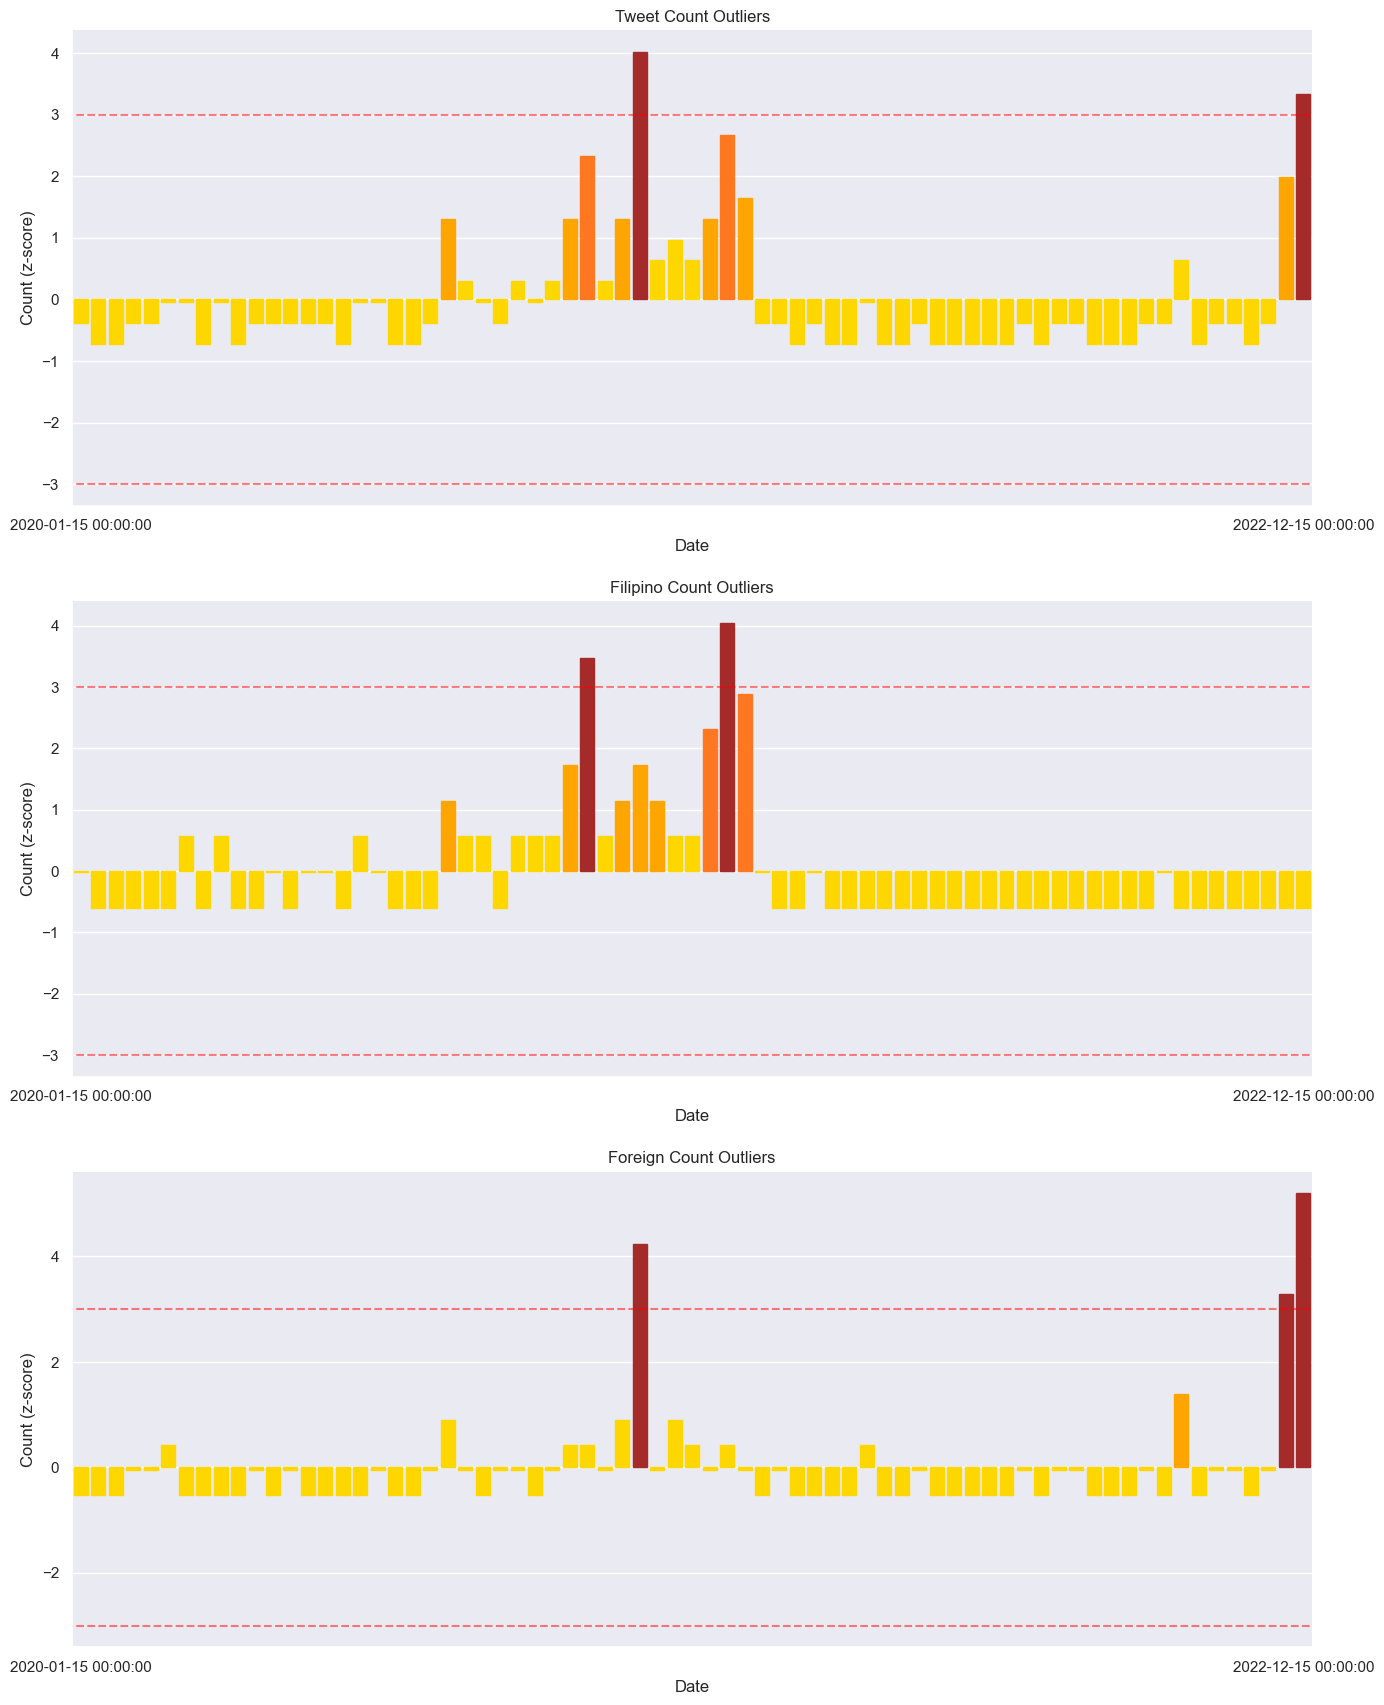

In [489]:
display(df_scaled)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(16, 21))

def color_bars(ax, df):
    for i in range(len(df)):
        val = abs(df[i])
        if val <= 1:
            color = 'gold'
        elif val <= 2:
            color = 'orange'
        elif val <= 3:
            color = '#FF7720'
        else:
            color = 'brown'
        ax.get_children()[i].set_color(color)

sns.barplot(x=df_scaled.index, y=df_scaled['Count'], ax=ax1)
sns.despine(ax=ax1)
ax1.set(title='Tweet Count Outliers', xlabel='Date', ylabel='Count (z-score)')
ax1.set_xticks([0, len(df_scaled)-1])
ax1.axhline(y=3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--') 
ax1.axhline(y=-3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--')
color_bars(ax1, df_scaled['Count'])

sns.barplot(x=df_scaled.index, y=df_scaled['Filipino_Count'], ax=ax2)
sns.despine(ax=ax2)
ax2.set(title='Filipino Count Outliers', xlabel='Date', ylabel='Count (z-score)')
ax2.set_xticks([0, len(df_scaled)-1])
ax2.axhline(y=3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--') 
ax2.axhline(y=-3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--')
color_bars(ax2, df_scaled['Filipino_Count'])

sns.barplot(x=df_scaled.index, y=df_scaled['Foreign_Count'], ax=ax3)
sns.despine(ax=ax3)
ax3.set(title='Foreign Count Outliers', xlabel='Date', ylabel='Count (z-score)')
ax3.set_xticks([0, len(df_scaled)-1])
ax3.axhline(y=3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--')
ax3.axhline(y=-3, xmin=-0.5, xmax=len(df_scaled)-0.5, color='red', alpha=0.5, ls='--')
color_bars(ax3, df_scaled['Foreign_Count'])

